In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.shape

(506, 14)

In [7]:
df.drop(['chas','dis','rad','zn'],axis=1,inplace=True)

In [8]:
df.head()

,crim,indus,nox,rm,age,tax,ptratio,b,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,222,18.7,396.90,5.33,36.2


In [23]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaled_variable=df[['indus','rm','age','tax','ptratio','b','lstat']]
scaled_variable

,indus,rm,age,tax,ptratio,b,lstat
0,2.31,6.575,65.2,296,15.3,396.90,4.98
1,7.07,6.421,78.9,242,17.8,396.90,9.14
2,7.07,7.185,61.1,242,17.8,392.83,4.03
3,2.18,6.998,45.8,222,18.7,394.63,2.94
4,2.18,7.147,54.2,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...
501,11.93,6.593,69.1,273,21.0,391.99,9.67
502,11.93,6.120,76.7,273,21.0,396.90,9.08
503,11.93,6.976,91.0,273,21.0,396.90,5.64
504,11.93,6.794,89.3,273,21.0,393.45,6.48


In [26]:
scaler= StandardScaler()

In [27]:
scaler.fit(scaled_variable)

StandardScaler()

In [28]:
scaled_variable=scaler.transform(scaled_variable)

In [29]:
df_scaled=pd.DataFrame(scaled_variable,columns=['indus','rm','age','tax','ptratio','b','lstat'])

In [30]:
df_scaled.head()

,indus,rm,age,tax,ptratio,b,lstat
0,-1.287909,0.413672,-0.120013,-0.666608,-1.459000,0.441052,-1.075562
1,-0.593381,0.194274,0.367166,-0.987329,-0.303094,0.441052,-0.492439
2,-0.593381,1.282714,-0.265812,-0.987329,-0.303094,0.396427,-1.208727
3,-1.306878,1.016303,-0.809889,-1.106115,0.113032,0.416163,-1.361517
4,-1.306878,1.228577,-0.511180,-1.106115,0.113032,0.441052,-1.026501


In [32]:
df.drop(['indus','rm','age','tax','ptratio','b','lstat'],axis=1,inplace=True)

In [33]:
df=pd.concat([df,df_scaled],axis=1)

In [34]:
df.head()

,crim,nox,medv,indus,rm,age,tax,ptratio,b,lstat
0,0.00632,0.538,24.0,-1.287909,0.413672,-0.120013,-0.666608,-1.459000,0.441052,-1.075562
1,0.02731,0.469,21.6,-0.593381,0.194274,0.367166,-0.987329,-0.303094,0.441052,-0.492439
2,0.02729,0.469,34.7,-0.593381,1.282714,-0.265812,-0.987329,-0.303094,0.396427,-1.208727
3,0.03237,0.458,33.4,-1.306878,1.016303,-0.809889,-1.106115,0.113032,0.416163,-1.361517
4,0.06905,0.458,36.2,-1.306878,1.228577,-0.511180,-1.106115,0.113032,0.441052,-1.026501


In [35]:
X=df.drop(['medv'],axis=1)
y=df['medv']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

<Axes: >

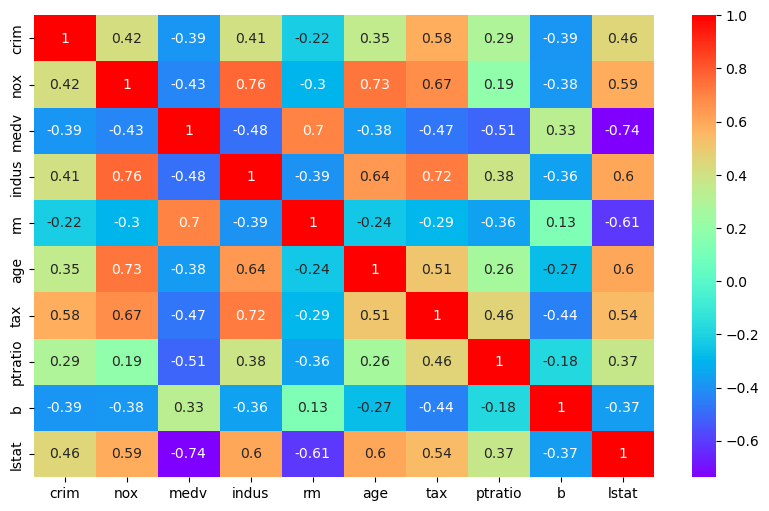

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
knn_model=KNeighborsRegressor()

In [41]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor()

In [42]:
y_pred=knn_model.predict(X_test)
y_pred

array([19.12, 21.48, 19.16, 20.82, 13.7 , 21.12, 18.58, 10.62, 17.08,
       22.2 , 24.24, 21.74, 24.4 , 20.94, 20.26, 23.64, 33.06, 13.84,
       16.62, 18.3 , 41.04, 47.36, 25.4 , 34.38, 22.62, 24.26, 18.8 ,
       23.68, 22.92, 21.86, 12.22, 21.48, 20.  , 10.94, 23.94, 15.54,
       44.66, 22.14, 19.58, 32.76, 10.2 , 16.56,  8.86, 17.64, 25.58,
       23.22, 19.58, 22.72, 14.4 , 12.52, 37.6 , 34.38, 15.24, 42.52,
       21.82, 27.96, 22.04, 19.6 , 14.04, 21.96, 27.96, 19.08, 21.78,
       20.42, 20.78, 20.06, 23.92, 11.72, 20.42, 13.84, 31.5 , 21.  ,
       23.74, 22.46, 18.78, 24.9 , 24.08, 24.08, 23.78, 20.16, 15.12,
       13.54, 25.38, 15.16, 23.88, 22.64, 22.56, 18.  , 23.82, 21.52,
       19.38, 23.52, 19.08, 13.22, 20.48, 25.96, 18.56, 21.84, 13.16,
       20.78, 18.84, 23.84])

In [43]:
y_test

498    21.2
94     20.6
150    21.5
221    21.7
423    13.4
       ... 
9      18.9
449    13.0
359    22.6
106    19.5
314    23.8
Name: medv, Length: 102, dtype: float64

# RMSE 

In [53]:
from sklearn.metrics import r2_score,mean_squared_error

In [54]:
print("Score",r2_score(y_test,y_pred))

Score 0.7909028691555146


In [55]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 3.669740066661772


In [ ]:
# K-FOLD CROSS VALIDATION

In [52]:
from sklearn.model_selection import cross_val_score

In [57]:
cross_val=cross_val_score(estimator=knn_model,X=X_train,y=y_train,cv=5)
cross_val

array([0.74203696, 0.76438284, 0.82366478, 0.63308127, 0.84283931])

In [58]:
cross_val.mean()

0.761201030032402